### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubuser


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Ingresos por tienda
lista_tiendas = [tienda1, tienda2, tienda3, tienda4]


In [ ]:
def calcular_ingresos(lista_tiendas):
    ingresos = []
    for tienda in lista_tiendas:
        ingresos.append(tienda['Precio'].sum())
    return ingresos


In [ ]:
ingresos_totales = calcular_ingresos(lista_tiendas)

for i, ingreso in enumerate(ingresos_totales, start=1):
    print(f"Tienda {i}: ${ingreso}")

Tienda 1: $1150880400.0
Tienda 2: $1116343500.0
Tienda 3: $1098019600.0
Tienda 4: $1038375700.0


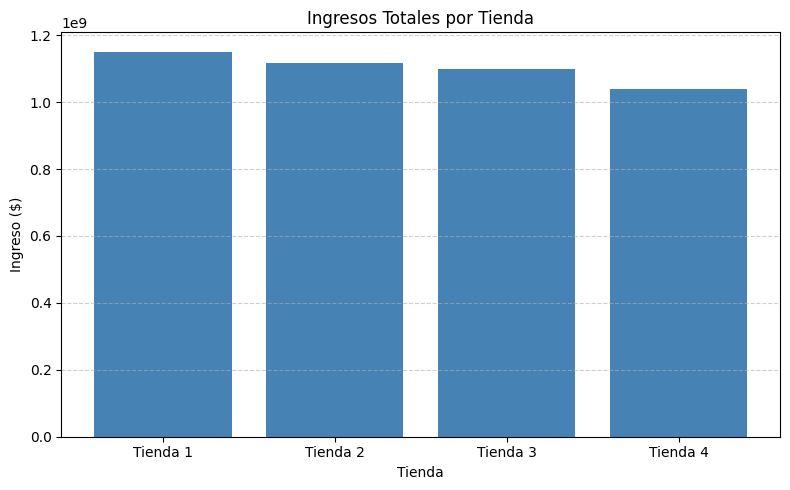

In [ ]:
#Visualización de Ventas por Tienda

import matplotlib.pyplot as plt

# Etiquetas de las tiendas
nombres_tiendas = [f'Tienda {i}' for i in range(1, len(lista_tiendas) + 1)]

# Gráfico
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos_totales, color='steelblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
#Ingresos por categoría de cada tienda

def total_ventas_por_categoria(lista_tiendas):
    ventas_por_categoria = []
    for i, tienda in enumerate(lista_tiendas, start=1):
        conteo = tienda['Categoría del Producto'].value_counts()
        ventas_por_categoria.append(conteo)
        print(f"\nVentas por categoría - Tienda {i}:\n{conteo}")
    return ventas_por_categoria

In [ ]:
ingresos_categorias = total_ventas_por_categoria(lista_tiendas)


Ventas por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ventas

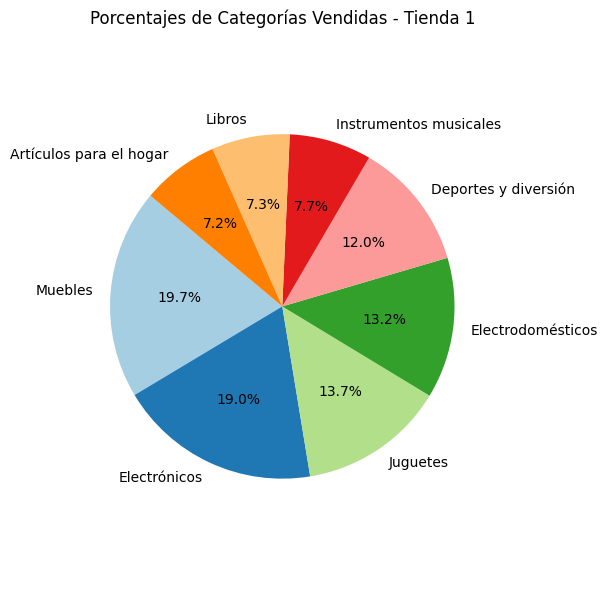

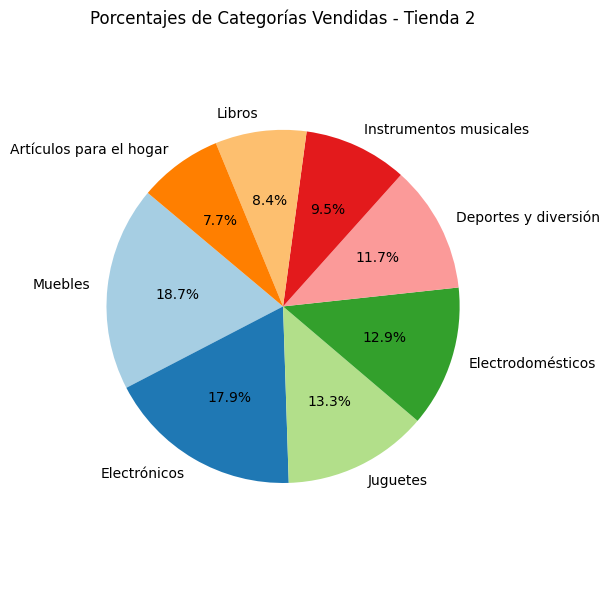

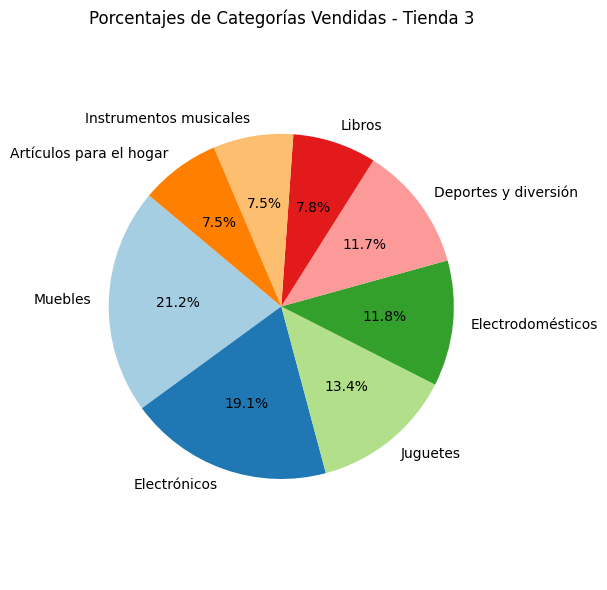

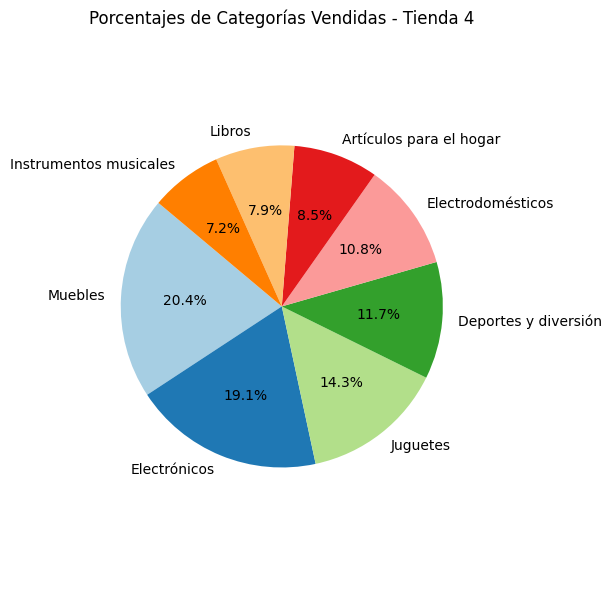

In [ ]:
#Visualización de categorías más vendidas por tienda

# Iterar sobre los conteos de cada tienda
for i, conteo in enumerate(ingresos_categorias, start=1):
    plt.figure(figsize=(6, 6))
    plt.pie(
        conteo.values,
        labels=conteo.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Porcentajes de Categorías Vendidas - Tienda {i}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()




# 3. Calificación promedio de la tienda


In [ ]:
#Calificaciones por Tienda según los clientes

def calificacion_promedio(lista_tiendas):
    calificaciones_promedio = []
    for i, tienda in enumerate(lista_tiendas, start=1):
        promedio = tienda['Calificación'].mean()
        calificaciones_promedio.append(promedio)
        print(f"Calificación promedio - Tienda {i}: {promedio:.2f}")
    return calificaciones_promedio

In [ ]:
promedios_tiendas = calificacion_promedio(lista_tiendas)

Calificación promedio - Tienda 1: 3.98
Calificación promedio - Tienda 2: 4.04
Calificación promedio - Tienda 3: 4.05
Calificación promedio - Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
# Productos más y menos populares por tienda

def total_ventas_productos_groupby(lista_tiendas):
    ventas_por_producto = []
    for i, tienda in enumerate(lista_tiendas, start=1):
        conteo = tienda.groupby('Producto').size().sort_values(ascending=False)
        ventas_por_producto.append(conteo)

        print(f"\nTienda {i} - Más vendidos:\n{conteo.head()}")
        print(f"\nTienda {i} - Menos vendidos:\n{conteo.tail()}")
    return ventas_por_producto


In [ ]:
ventas_productos = total_ventas_por_producto(lista_tiendas)


Top productos - Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56

Menos vendidos - Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33

Top productos - Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58

Menos vendidos - Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32

Top productos - Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55

Menos vendidos - Tienda 3:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                

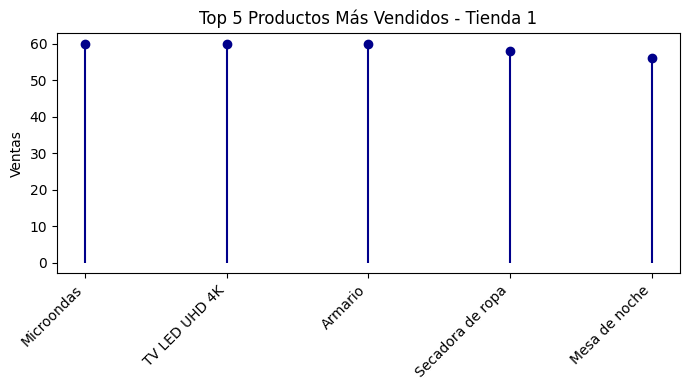

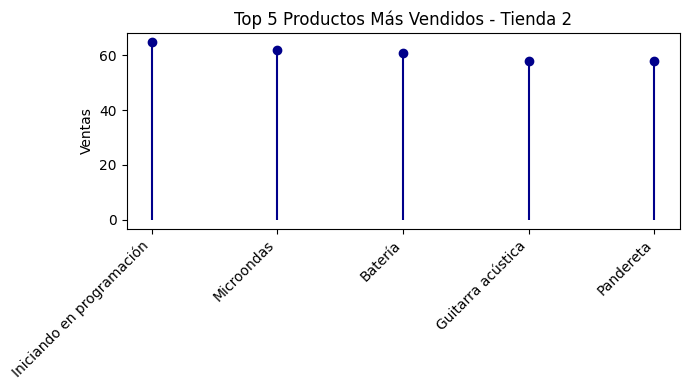

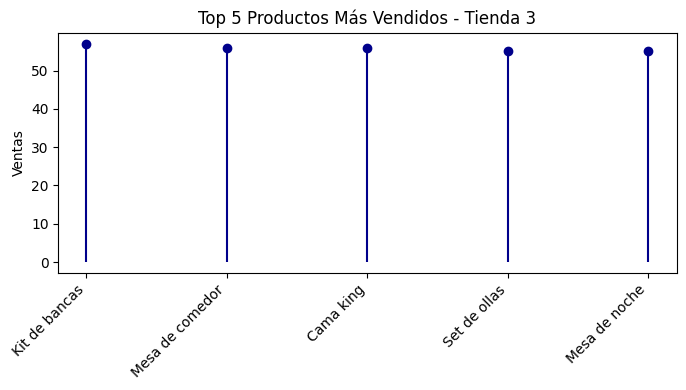

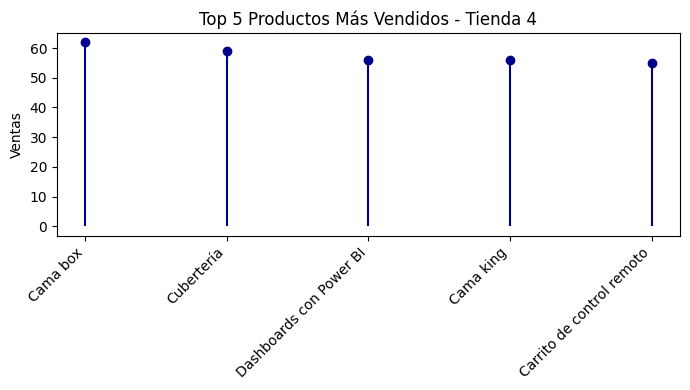

In [ ]:
#Visualización de los productos más y menos vendidos por tienda

for i, conteo in enumerate(ventas_productos, start=1):
    top = conteo.head(5)

    plt.figure(figsize=(7, 4))
    plt.stem(top.index, top.values, basefmt=" ", linefmt="darkblue", markerfmt="o")
    plt.title(f'Top 5 Productos Más Vendidos - Tienda {i}')
    plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



# 5. Envío promedio por tienda

In [ ]:
#Costos de envío promedio por tienda

def total_envio_promedio(lista_tiendas):
    promedios_envio = []
    for i, tienda in enumerate(lista_tiendas, start=1):
        promedio = tienda['Costo de envío'].mean()
        promedios_envio.append(promedio)
        print(f"Tienda {i} - Envío promedio: ${promedio:.2f}")
    return promedios_envio


In [ ]:
promedios_envio = total_envio_promedio(lista_tiendas)


Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


# 📊 INFORME FINAL

## 🔍 Objetivo:

Identificar la tienda menos eficiente de la cadena Alura Store para recomendar su venta y así liberar recursos para un nuevo emprendimiento del Sr. Juan.



##Resumen del Análisis por categorías:


###💵 Ingresos totales de las tiendas:

Como podemos observar en el gráfico de barras, hay diferencias significativas de ventas entre tiendas, siendo la **Tienda 4** la de menor margen de utilidad.

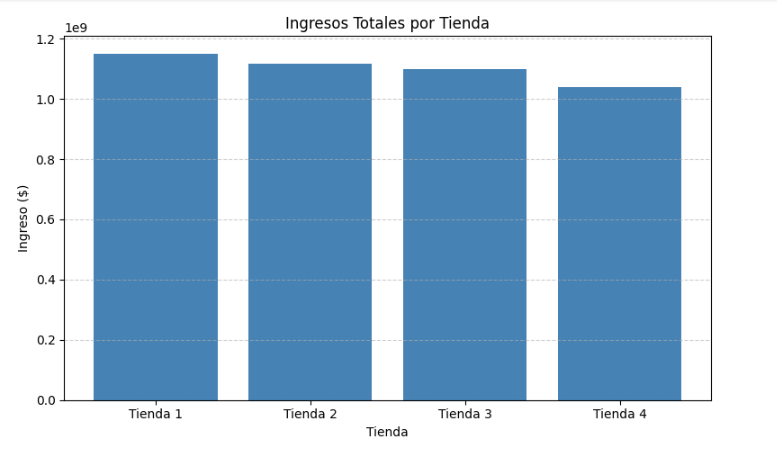


###📦 Las Categorías más y menos vendidas:

Nuestro gráfico de pastel nos permite observar que cada tienda tiene patrones de venta distintos, aunque tienen los siguientes puntos en común entre las 4:

- Las categorías de **Muebles y Electrónicos rebasan el 15% del total de sus ventas.**
- Las categorías de **Instrumentos Musicales, Libros y Artículos para el hogar representan menos del 10% del total de sus ventas.**

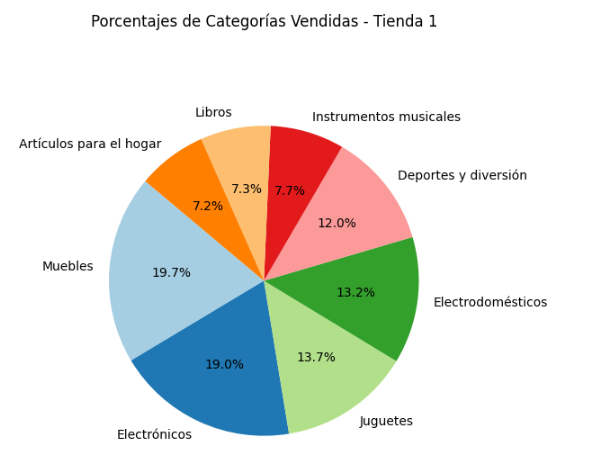
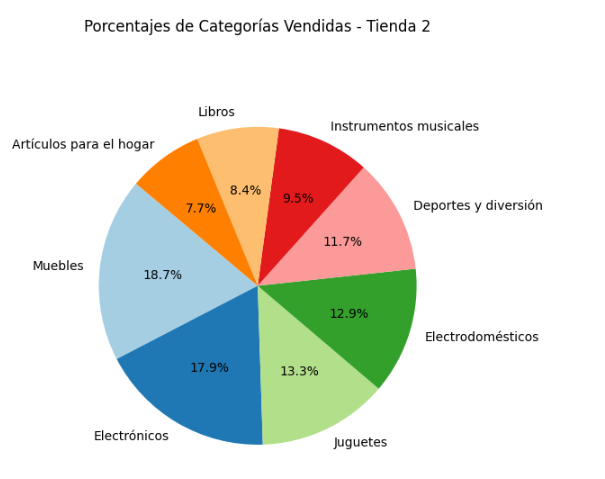
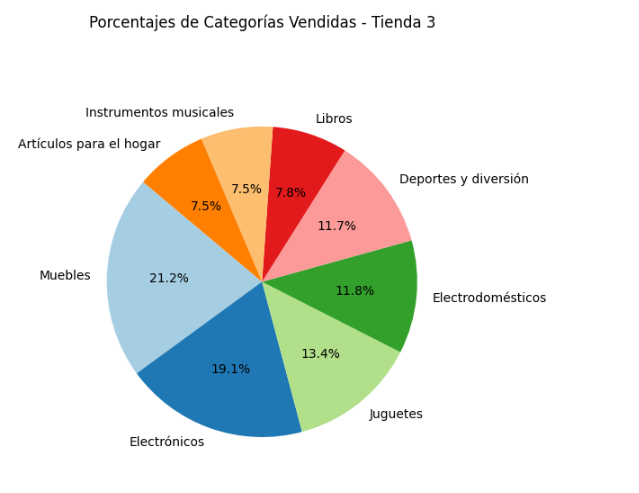
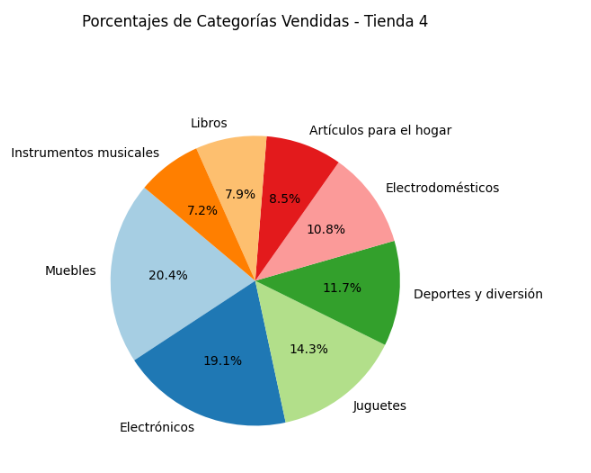

###🌟 Las calificaciones de los clientes:

La mayoría de las tiendas se mantiene con una califación aceptable arriba de 4.0 puntos, destacando la **Tienda 3** al obtener la **calificación más alta de 4,05 puntos**. Por otro lado, la Tienda 1 es la única por debajo de la media, con una calificación de 3,98 puntos, lo cual podría estar afectando la reputación general de la marca.


###🛒 Los productos más y menos vendidos.

Se identificaron los productos estrella entre las tiendas que rebasan las 60 compras: Microondas, TV LED UHD 4K y los productos menos pupulares que tenían debajo de 33 compras: Juegos de mesa, Auriculares con micrófono y Guitarra Eléctrica.

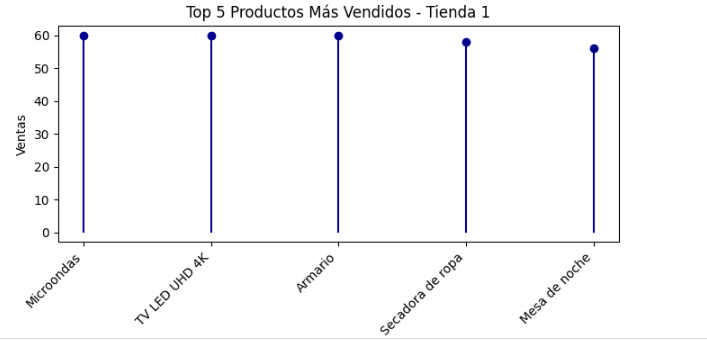
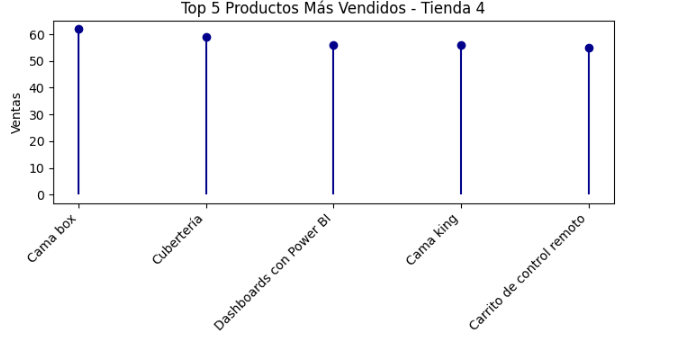

###🚚 El coste de envío promedio para cada tienda.

La tienda con costo de envío más alto es la Tienda 1, esto se equilibra ya que es la tienda con mayor número de ventas. La tienda con el costo de envío más bajo es la Tienda 4, pero respectivamente también es la tienda con menor número de ventas. Estos datos nos arrojan información clave que influirá más adelante en nuestra recomendación final

##✅ Recomendación Final:
Con base en los datos analizados, se recomienda que el Sr. Juan venda la Tienda 4 debido a los siguientes factores:

- Representa la Tienda con la facturación más baja
- Es la que demuestra un patrón de compra por categoría más polarizado, es decir, concentra sus ventas en categorías que las demás tiendas también ofrecen a los clientes.
- Si bien tiene una calificación aceptable de satisfacción con los clientes, la tienda 2 y 3 cubren un mejor desempeño en esta categoría.
- Aunque cubre de manera satisfactoria la demanda en las categorías de venta altas como muebles y juguetería, demuestra una problemática logística en cuanto a la rotación de productos de la categoría de Electrodomésticos, separándose del resto de tiendas que cubren de forma satisfactoria una de las categorías más distintivas que ofrece la cadena.
- Su logística de envíos es destacable, no obstante, este buen desempeño no es suficiente para representar una mejora significativa en el número de ventas totales que tiene la tienda.

## 📌 En Conclusión:

La tienda 4 representa un punto de ineficiencia operativa y comercial en comparación con las otras tiendas, lo cual sugiere que es la mejor candidata para realizar un nuevo emprendimiento, ya sea vendiéndola o cambiándola de giro.

Adicionalmente, este análisis arrojó los siguientes datos clave como áreas oportunidad para la mejora de la cadena Alura Store:

- La Tienda 1 puede mejorar sus costes y logística de envíos, así como la atención al cliente.
- Las Tiendas 2 y 3 tienen oportunidad de mejorar costes y logística de envíos.